In [1]:
import train as tn
reload(tn)

import plotting
reload(plotting)

import util as ut

import matplotlib.pyplot as plt
#plt.style.use('seaborn-ticks')
plt.style.use('seaborn-poster')
%matplotlib inline
#%matplotlib notebook

import numpy as np

from pprint import pprint

import itertools

# import xgboost

Welcome to ROOTaaS 6.06/08


In [2]:
#note that the loading option is True by default
ut.defaultParameters(dataDir='./data', inputName="effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out", inputDir='./classifiers')
ut.setParams()
effFitter = ut.loadOrMake()

Load object with the name effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out and the following paramters 
./classifiers
./classifiers/effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out.pkl.gz
loading pickle ./classifiers/effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out.pkl.gz
loading data ./classifiers/effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out.root
Index([u'absweight', u'class', u'genJet2p5Pt0', u'genJet2p5Pt1',
       u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Rapidity0',
       u'genJet2p5Rapidity1', u'genJet2p5Rapidity2', u'genJet2p5Rapidity3',
       u'genNjets2p5', u'genPt', u'genRapidity', u'recoNjets2p5', u'recoPt',
       u'recoRapidity', u'weight', u'proc', u'absGenRapidity', u'recoPtBin',
       u'recoPtCat', u'recoNjets2p5Bin', u'recoNjets2p5Cat', u'class_prob_0',
       u'class_prob_1', u'class_prob_2', u'class_prob_3', u'recoPtCat_prob_0',
       u'recoPtCat_prob_1', u'recoPtCat_prob_2', u'recoPtCat_prob_3',
       u'recoPtCat_prob_4', u'recoPtCat_prob_5', u'recoPtCat

In [6]:
df = effFitter.df
first_train_evt = int(round(df.index.size*(1.-effFitter.split_frac)))

#take the test sample 
df_test = df[:first_train_evt]

# generate confusion matrix

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap,origin='lower')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    #print(cm)
    
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, np.round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    
    plt.tight_layout()
    plt.ylabel('true category')
    plt.xlabel('predicted category')


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [21]:
df_test['class'][0:5]

random_index
0    0
1    2
2   -1
3   -1
4    1
Name: class, dtype: int8

In [9]:
Xbr = ["genJet2p5Pt0", "genJet2p5Rapidity0",
                                    "genJet2p5Pt1", "genJet2p5Rapidity1",
                                    "genJet2p5Pt2", "genJet2p5Rapidity2",
                                    "genJet2p5Pt3", "genJet2p5Rapidity3",
                                    "genPt","absGenRapidity",
                   'class_prob_0','class_prob_1','class_prob_2','class_prob_3'
                                ]

In [10]:
X_test = df_test[Xbr].values

In [11]:
clf = effFitter.clfs['recoNjets2p5']

In [13]:
y_pred = clf.predict(X_test)

In [14]:
Ybr = 'recoNjets2p5Cat'
y_test = df_test[Ybr].values

In [15]:
class_names = np.arange(y_test.max()+2) -1

Each event in the confusion matrix is weighted
Confusion matrix, without normalization
Normalized confusion matrix


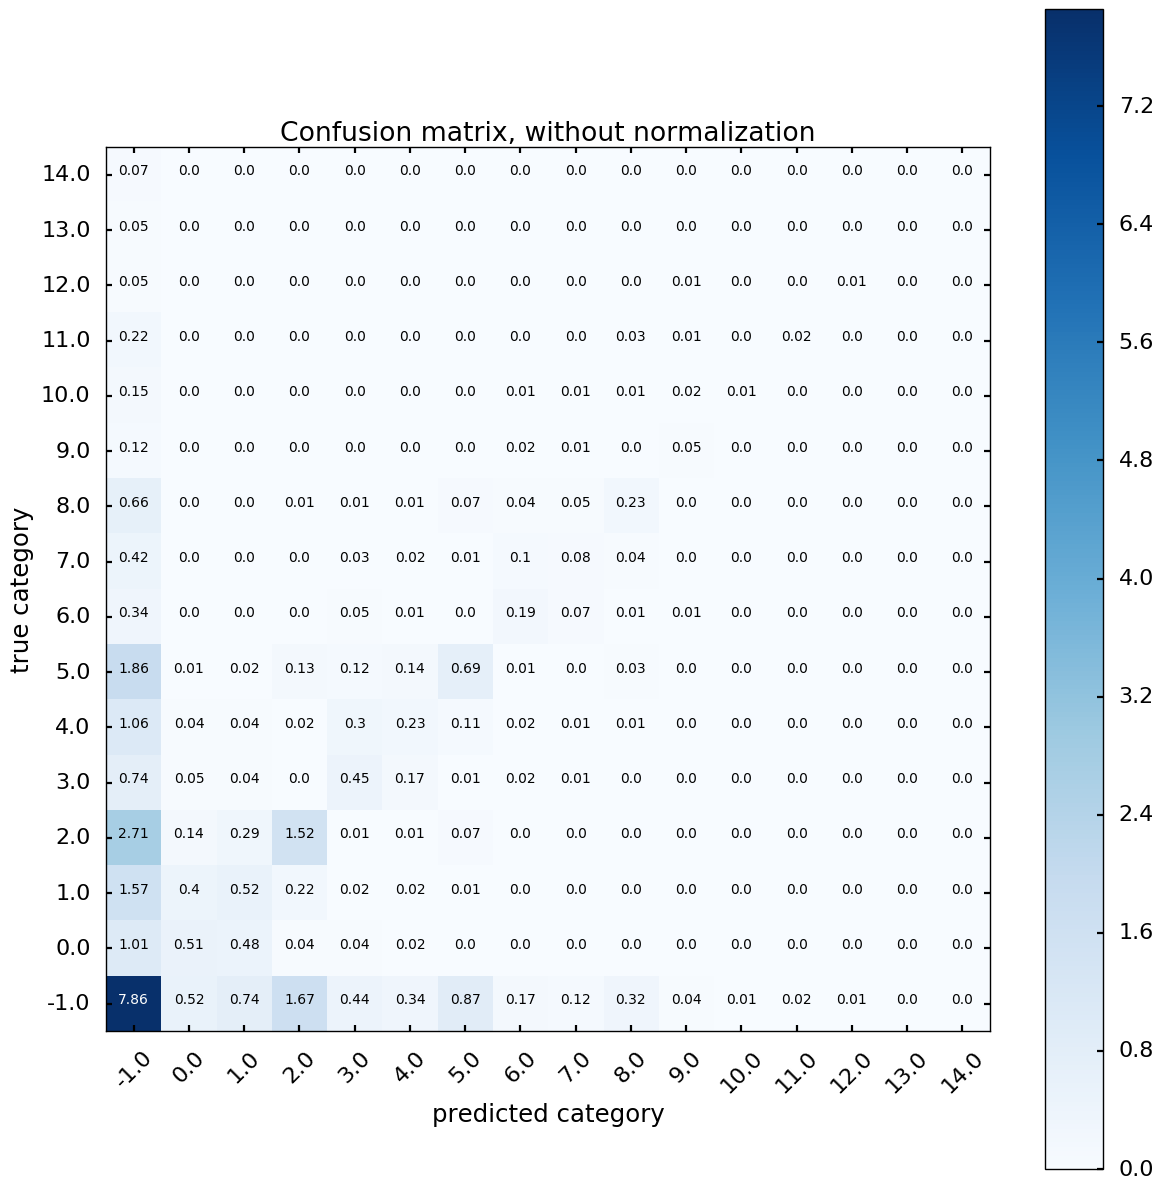

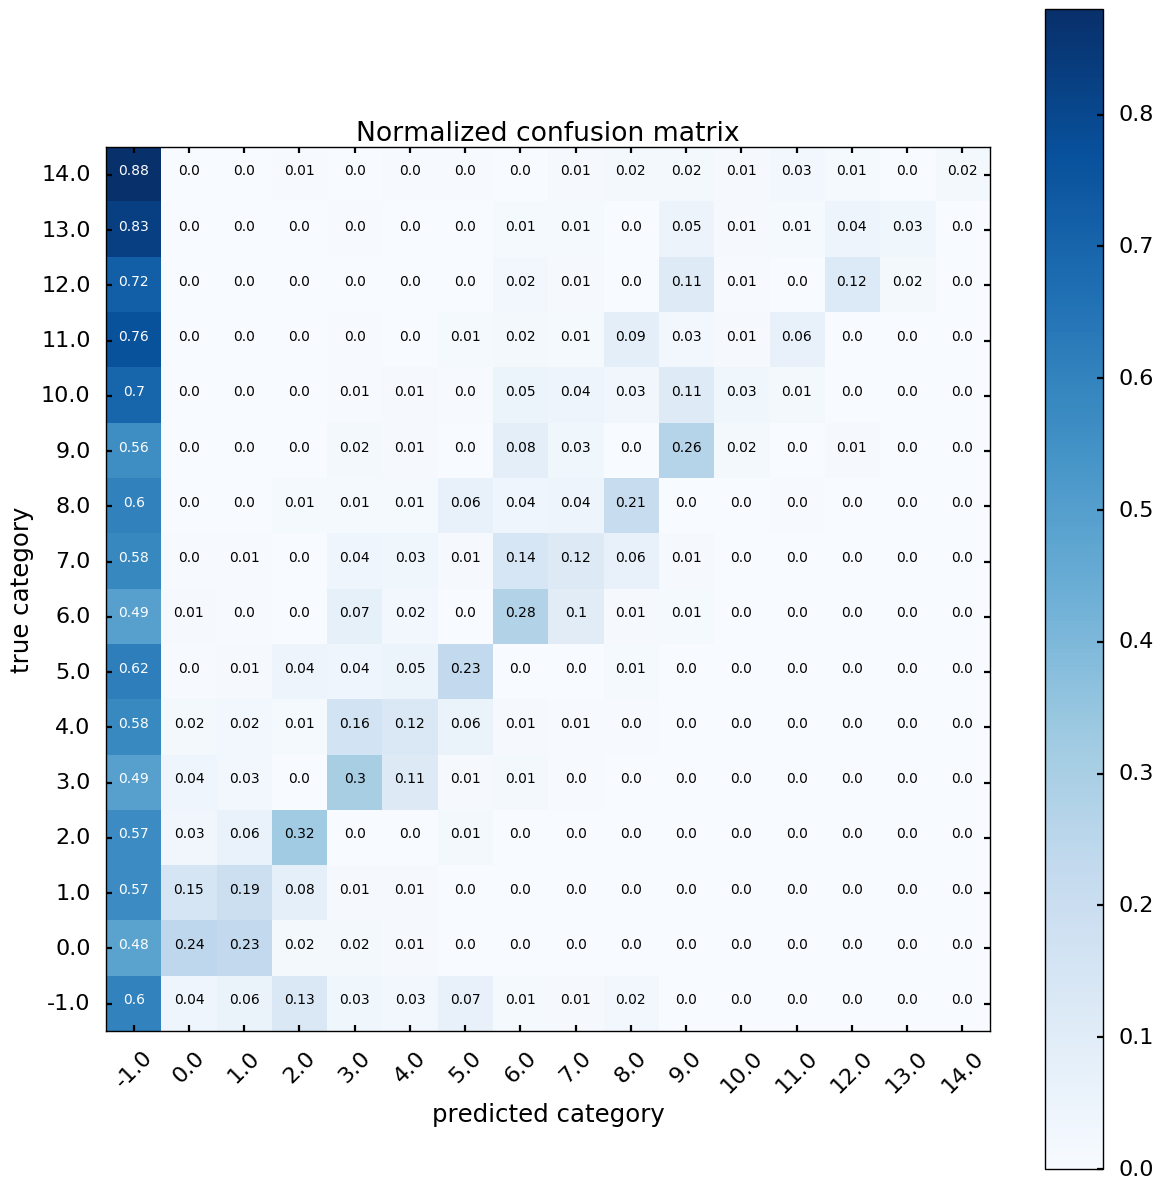

In [16]:
# Compute confusion matrix
print('Each event in the confusion matrix is weighted')
cnf_matrix = confusion_matrix(y_test, y_pred,sample_weight=df_test['absweight'].values)
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Each event in the confusion matrix is weighted
get rid of the not reconstructed column
(15, 15)
Confusion matrix, without normalization
Normalized confusion matrix


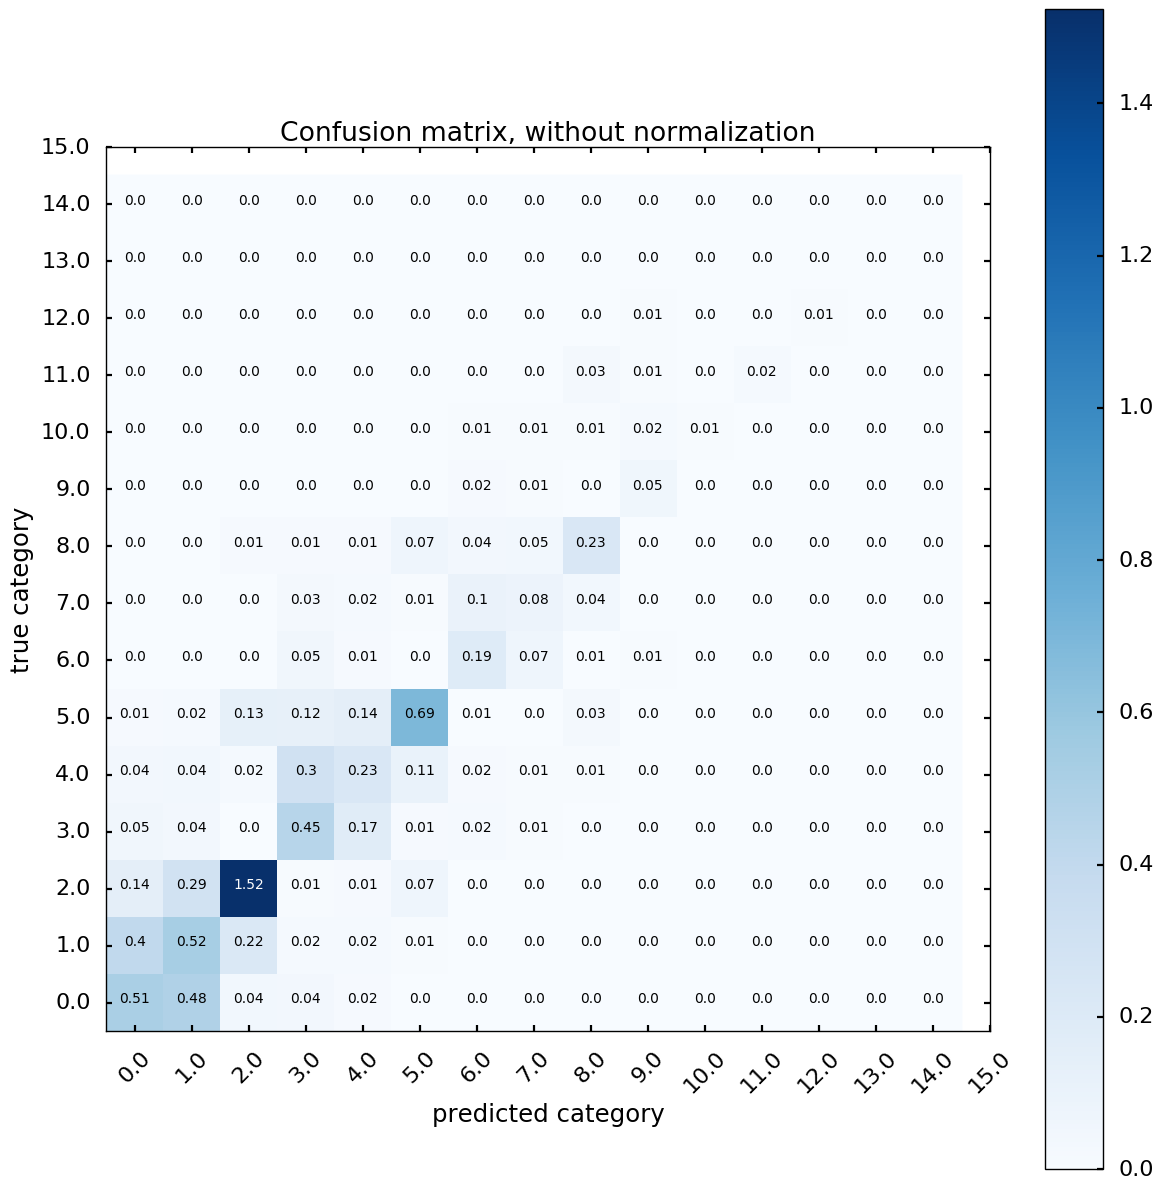

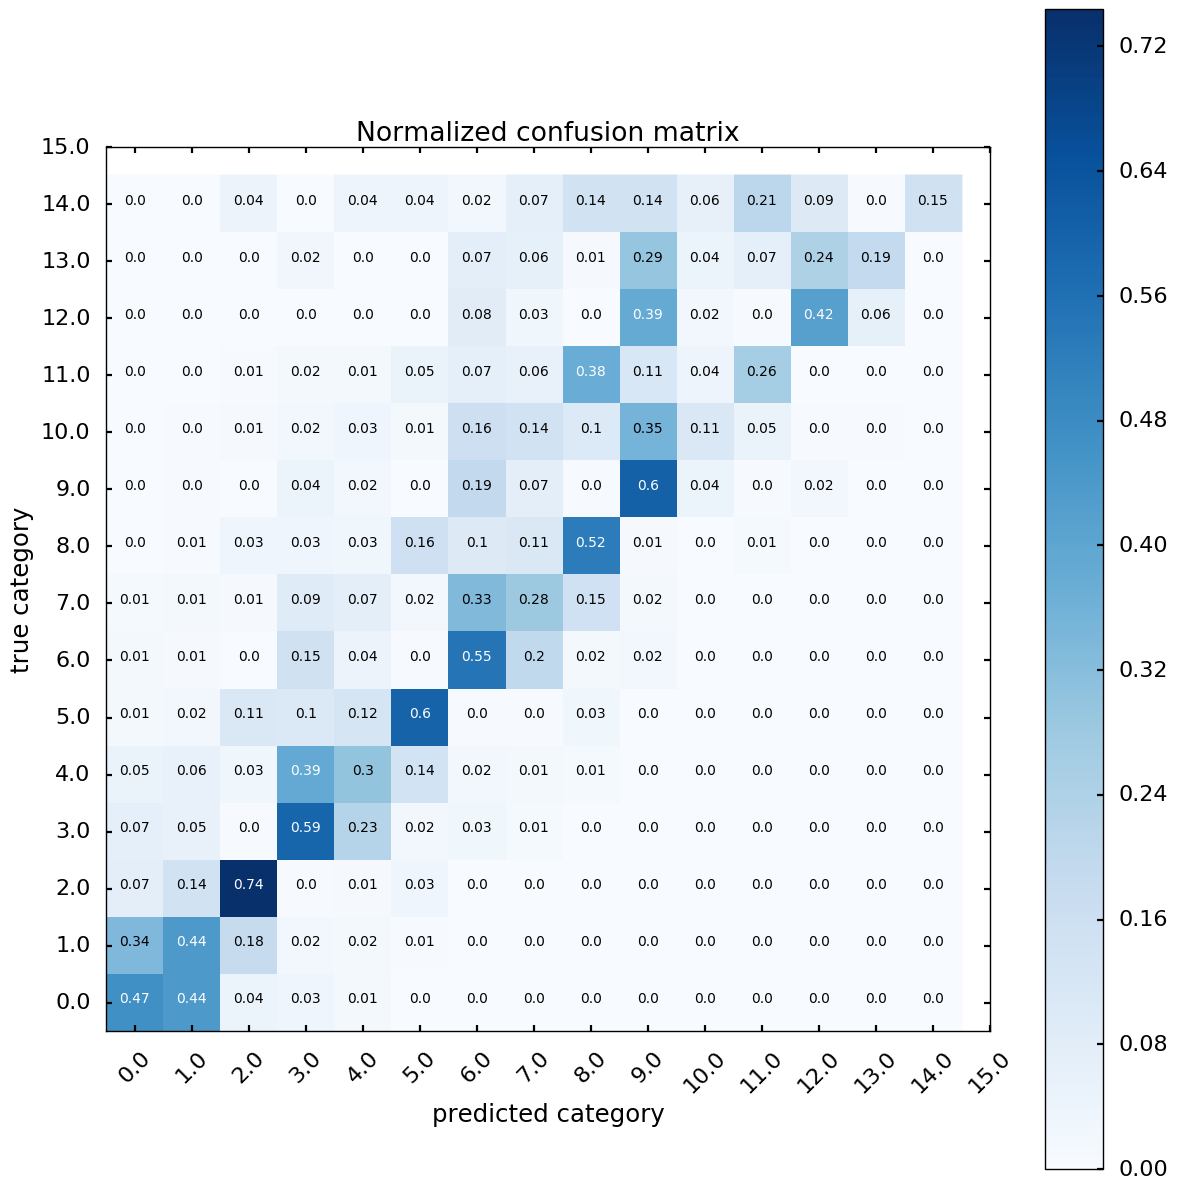

In [17]:
# Compute confusion matrix
print('Each event in the confusion matrix is weighted')
print('get rid of the not reconstructed column')

cnf_matrix = confusion_matrix(y_test, y_pred,sample_weight=df_test['absweight'].values)
print(np.shape(cnf_matrix[1::,1::]))

cnf_matrix = cnf_matrix[1::,1::]
class_names = np.arange(y_test.max()+2) 

np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()